In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import treecorr

In [2]:
import polarSumStats as polar

def comp2pcfTreecorr(x, y, k, size, bins):
    """Calculate 2pcf for scalar k."""
    cat = treecorr.Catalog(x=x, y=y, k=k, w=None)
    if size=='big':
        mxsep = 2
        nbins = bins
        mnsep = 0.1
    elif size=='small':
        mxsep = 0.5
        nbins = bins
        mnsep = 0
    kk = treecorr.KKCorrelation(min_sep=mnsep, max_sep=mxsep, nbins=nbins,
                                bin_type='TwoD', bin_slop=0)
    kk.process(cat)
    return kk

def getHistogram(annulus, nBins):
    """Return a binned version of given annulus."""
    theEdges = np.linspace(-90, 90, nBins + 1)
    theBins = (theEdges[1:] + theEdges[:-1])/2
    conditions = [(annulus.theta>=theEdges[i])&(annulus.theta<theEdges[i+1])
                  for i in range(nBins)]
    binnedXi = [np.mean(annulus.xi[conditions[i]]) for i in range(nBins)]
    
#     # want to convert this to bins from 0 to 180 for display purposes
#     posBins = (theBins+180)%180
#     order = np.argsort(posBins)

    return np.array(binnedXi), theBins

In [3]:
simdir = '/home/groups/burchat/chebert/psfwsPaperSims/'

In [4]:
d = pickle.load(open(simdir+'rand150.p', 'rb'))

### LARGE SCALES 

In [6]:
kk_b = comp2pcfTreecorr(d['thx'], d['thy'], d['e1'], 'big', 101)
polarKk_b = polar.get2pcfPolar(kk_b)
ann_b = polar.get2pcfAnnulus(polarKk_b, 1.8, .2)
annHist_b = polar.getHistogram(ann_b, 30)

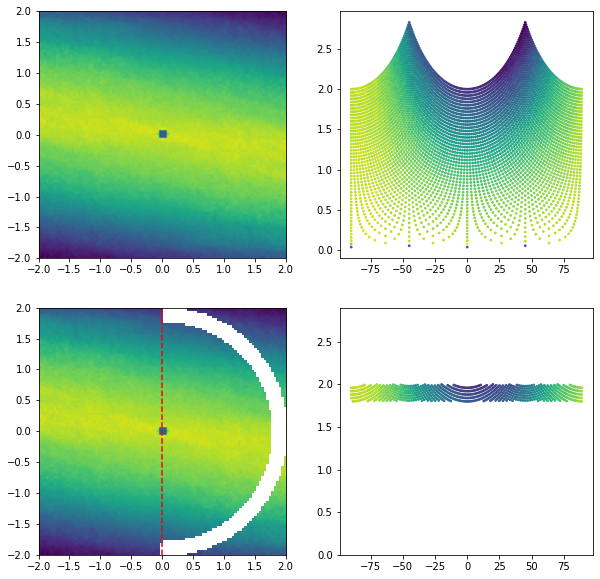

In [32]:
f, a = plt.subplots(2,2, figsize=(10,10))

vmax=max(kk_b.xi.flatten())
vmin=min(kk_b.xi.flatten())

a[0,0].imshow(kk_b.xi, extent=[-kk_b.max_sep, kk_b.max_sep, -kk_b.max_sep, kk_b.max_sep], 
              origin='lower', vmin=vmin, vmax=vmax)

a[0,1].scatter(polarKk_b.theta, polarKk_b.r, c=polarKk_b.xi, vmin=vmin, vmax=vmax, s=3)

a[1,0].imshow(kk_b.xi, extent=[-kk_b.max_sep, kk_b.max_sep, -kk_b.max_sep, kk_b.max_sep], 
              origin='lower', vmin=vmin, vmax=vmax)
a[1,0].scatter(ann_b.r * np.cos(ann_b.theta * np.pi/180),
               ann_b.r * np.sin(ann_b.theta * np.pi/180), marker='s', color='w', s=10)
a[1,0].axvline(0, linestyle='--', color='r')

a[1,1].scatter(ann_b.theta, ann_b.r, c=ann_b.xi, s=3, vmin=vmin, vmax=vmax)
a[1,1].set_ylim([0,2.9]);

In [33]:
len(ann_b.r)

733

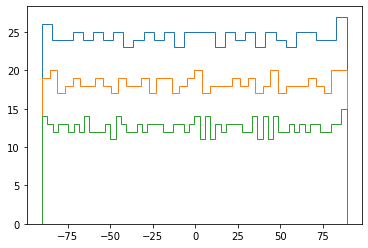

In [34]:
plt.hist(ann_b.theta, bins=30, histtype='step');
plt.hist(ann_b.theta, bins=40, histtype='step');
plt.hist(ann_b.theta, bins=58, histtype='step');

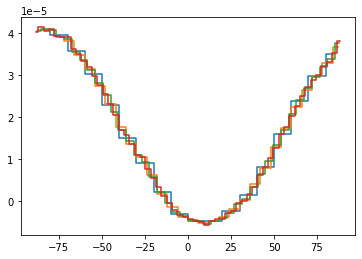

In [35]:
for bins in [18,30,40,58]:
    annHist, annbins = getHistogram(ann_b, bins)
    plt.plot(annbins, annHist, ds='steps-mid')

In [69]:
# variance = np.empty((3,50))
# for i, pcfbins in enumerate([51, 101, 151]):
#     kk = comp2pcfTreecorr(d['thx'], d['thy'], d['e1'], 'big', bins=pcfbins)
#     polarKk = polar.get2pcfPolar(kk)
#     ann = polar.get2pcfAnnulus(polarKk, 1.75, .25)
#     variance[i] = [np.std(np.histogram(ann.theta, bins=n)[0]) for n in range(10,60)]

In [70]:
# [plt.plot(range(10,60), variance[i], 'o', label=[51, 101,151][i]) for i in range(3)]
# plt.axvline(30)
# plt.legend()

### SMALL SCALES

In [22]:
kk_s = comp2pcfTreecorr(d['thx'], d['thy'], d['e1'], 'small', 201)
polarKk_s = polar.get2pcfPolar(kk_s)
ann_s = polar.get2pcfAnnulus(polarKk_s, 0.05, .05)
# annHist = polar.getHistogram(ann, 18)

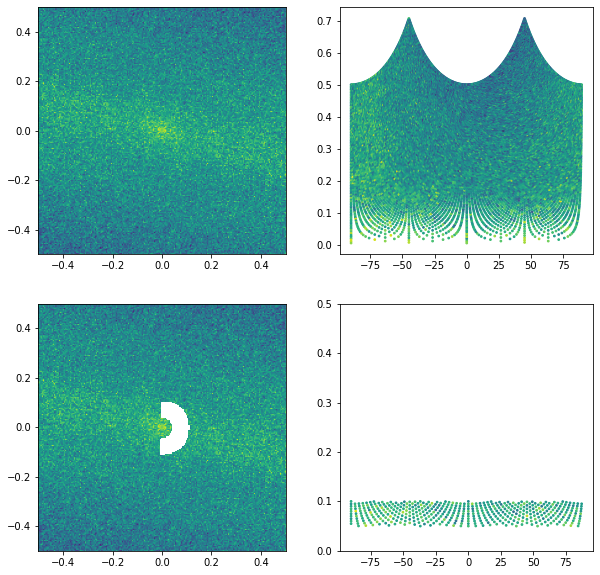

In [23]:
f, a = plt.subplots(2,2, figsize=(10,10))

vmax=max(kk_s.xi.flatten())
vmin=min(kk_s.xi.flatten())

a[0,0].imshow(kk_s.xi, extent=[-kk_s.max_sep, kk_s.max_sep, -kk_s.max_sep, kk_s.max_sep], 
              origin='lower', vmin=vmin, vmax=vmax)

a[0,1].scatter(polarKk_s.theta, polarKk_s.r, c=polarKk_s.xi, vmin=vmin, vmax=vmax, s=3)

a[1,0].imshow(kk_s.xi, extent=[-kk_s.max_sep, kk_s.max_sep, -kk_s.max_sep, kk_s.max_sep], 
              origin='lower', vmin=vmin, vmax=vmax)
a[1,0].scatter(ann_s.r * np.cos(ann_s.theta*np.pi/180), ann_s.r * np.sin(ann_s.theta*np.pi/180), marker='s', color='w', s=10)

a[1,1].scatter(ann_s.theta, ann_s.r, c=ann_s.xi, s=3, vmin=vmin, vmax=vmax)
a[1,1].set_ylim([0,0.5]);

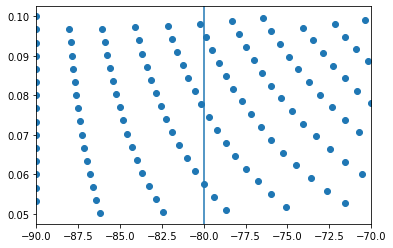

In [19]:
plt.plot(ann_s.theta, ann_s.r,'o')
plt.xlim(-90,-90+(180/18)+(180/18))
plt.axvline(-90+(180/18))

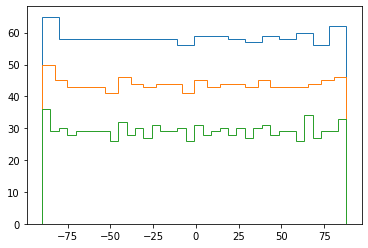

In [20]:
plt.hist(ann_s.theta, bins=18, histtype='step')
plt.hist(ann_s.theta, bins=24, histtype='step')
plt.hist(ann_s.theta, bins=36, histtype='step');

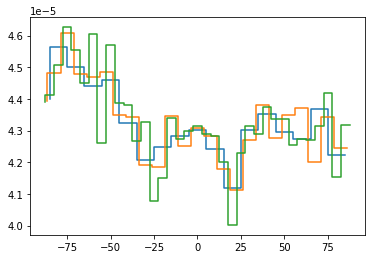

In [21]:
for bins in [18,24,36]:
    annHist, annbins = getHistogram(ann_s, bins)
    plt.plot(annbins, annHist, ds='steps')

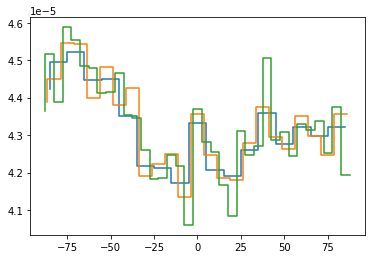

In [16]:
ann_s_small = polar.get2pcfAnnulus(polarKk_s, 0.05, .05)
for bins in [18,24,36]:
    annHist, annbins = getHistogram(ann_s_small, bins)
    plt.plot(annbins, annHist, ds='steps')

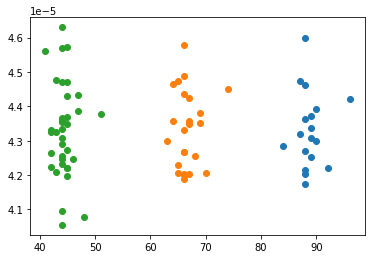

In [10]:
for bins in [18,24,36]:
    annHist, annbins = getHistogram(ann_s, bins)
    n,_ = np.histogram(ann_s.theta, bins)
    
    plt.plot(n, annHist, 'o')

In [107]:
hist, ns = [],[]

for num in np.random.choice(range(538),size=20):
    d = pickle.load(open(simdir+f'rand{num}.p', 'rb'))
    kk_s = comp2pcfTreecorr(d['thx'], d['thy'], d['e1'], 'small', 51)
    polarKk_s = polar.get2pcfPolar(kk_s)
    ann_s = polar.get2pcfAnnulus(polarKk_s, 0.05, .025)
    for bins,c in zip([18,24,36],['b','k','r']):
        annHist, annbins = getHistogram(ann_s, bins)
        hist += list(annHist/max(annHist))
        n,_ = np.histogram(ann_s.theta, bins)
        ns += list(n)
#         plt.plot(n, annHist/max(annHist),'o',color=c)

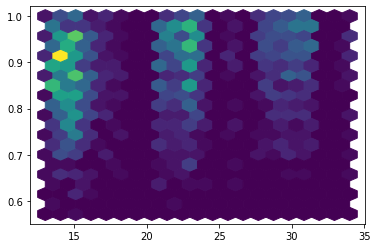

In [108]:
plt.hexbin(ns, hist, gridsize=(20,10))

In [106]:
np.corrcoef(ns, hist)

array([[ 1.        , -0.02039975],
       [-0.02039975,  1.        ]])

In [77]:
# variance = np.empty((3,30))
# for i, pcfbins in enumerate([31,51,71]):
#     kk = comp2pcfTreecorr(d['thx'], d['thy'], d['e1'], 'small', bins=pcfbins)
#     polarKk = polar.get2pcfPolar(kk)
#     ann = polar.get2pcfAnnulus(polarKk, 0.05, .025)
#     variance[i] = [np.std(np.histogram(ann.theta, bins=n)[0]) for n in range(10,40)]

In [78]:
# [plt.plot(range(10,40), variance[i], 'o', label=[31,51,71][i]) for i in range(3)]
# plt.axvline(18)
# plt.legend()